>### Mini-Batch
 - 均衡于算法的时间复杂度（加载全部数据训练更快）以及算法的准确度（加载单个数据训练更准）

    在外层循环中，每一层是一个epoch（训练周期），在内层循环中，每一次是一个Mini-Batch（Batch的迭代）
    ``` 
    for epoch in range(training_epochs):
         for i in range(total_batch):
   ```

>### DataLoader
- 参数\
    batch_size,shuffle(洗牌，用于打乱顺序)
- 功能\
  通过获得DataSet的索引以及数据集大小，来自动得生成小批量训练集

    DataLoader先对数据集进行洗牌，再将数据集按照Batch_Size的长度划分为小的Batch，并按照Iterations进行加载，以方便通过循环对每个Batch进行操作
    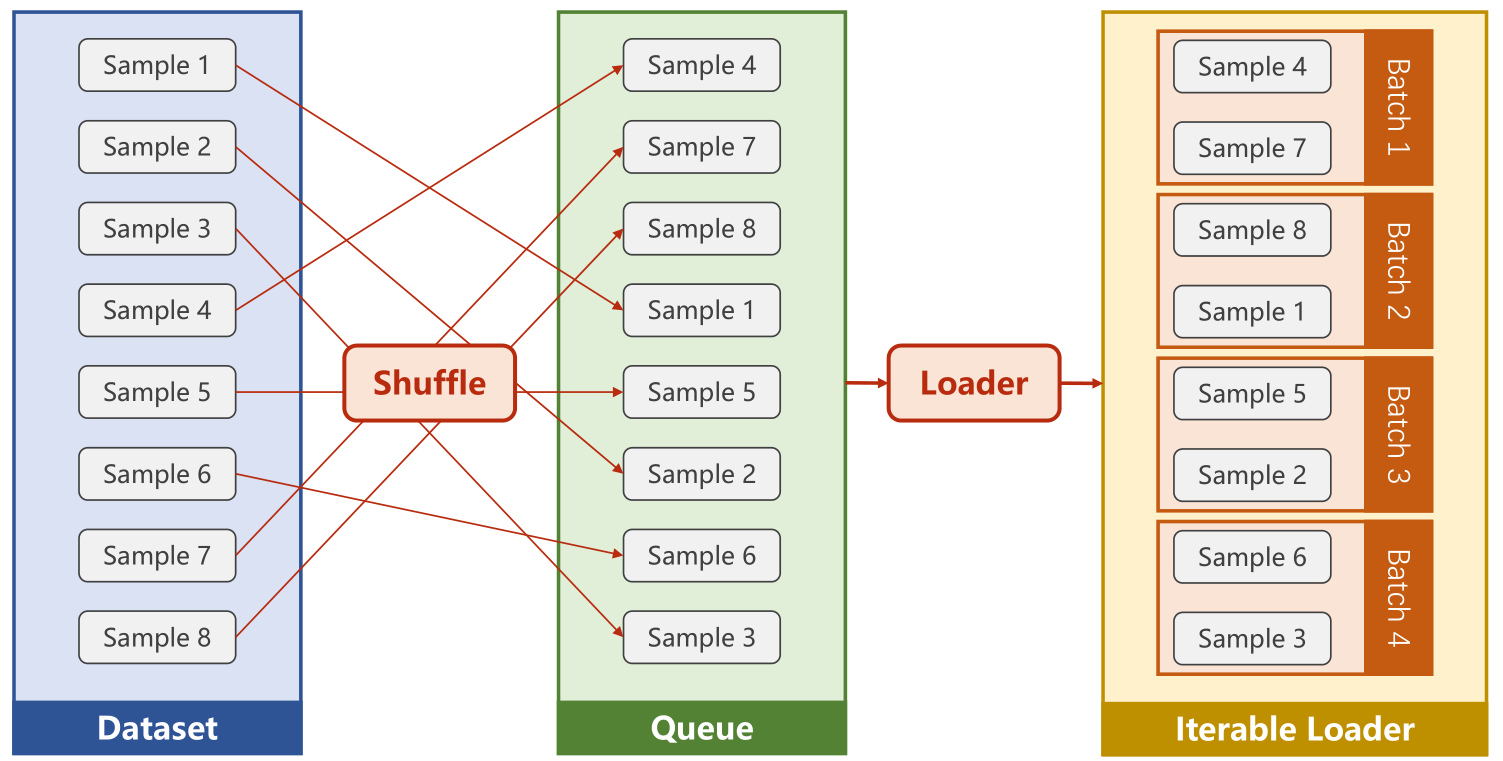

In [6]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class DiabetesDataset(Dataset):
    def __init__(self, filepath) -> None:
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        #获得数据集长度
        self.len=xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

dataset = DiabetesDataset("diabetes.csv")
train_loader = DataLoader(dataset=dataset, batch_size=32,
         shuffle=True, num_workers=0)


class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = Model()

criterion = torch.nn.BCELoss(size_average=True)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

if __name__ == "__main__":
    for epoch in range(100):
        for i, data in enumerate(train_loader, 0):
            # 将loader中的数据改写成x,y
            inputs, labels = data
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            print(epoch, i, loss.item())

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

0 0 0.8367915153503418
0 1 0.6798417568206787
0 2 0.5668852925300598
0 3 0.7068682312965393
0 4 0.5946453809738159
0 5 0.7039235234260559
0 6 0.5421445369720459
0 7 0.5408452153205872
0 8 0.5667504668235779
0 9 0.6503978967666626
0 10 0.7875202894210815
0 11 0.6215685606002808
0 12 0.6213796138763428
0 13 0.6731234788894653
0 14 0.621070384979248
0 15 0.621031641960144
0 16 0.671875
0 17 0.6708985567092896
0 18 0.5481905937194824
0 19 0.7965508699417114
0 20 0.7148534655570984
0 21 0.5540547370910645
0 22 0.6918465495109558
0 23 0.6473346948623657
1 0 0.5540786981582642
1 1 0.5281286239624023
1 2 0.6212402582168579
1 3 0.5968379378318787
1 4 0.6461270451545715
1 5 0.5967636108398438
1 6 0.6949703097343445
1 7 0.692807137966156
1 8 0.6679735779762268
1 9 0.6215429902076721
1 10 0.7594398856163025
1 11 0.6437975168228149
1 12 0.6654398441314697
1 13 0.7930426597595215
1 14 0.5846586227416992
1 15 0.64356929063797
1 16 0.7047185301780701
1 17 0.5649070143699646
1 18 0.54058837890625
1 19 